In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

# Basic statistics
print(df.head())
print(df.info())
print(df.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null 

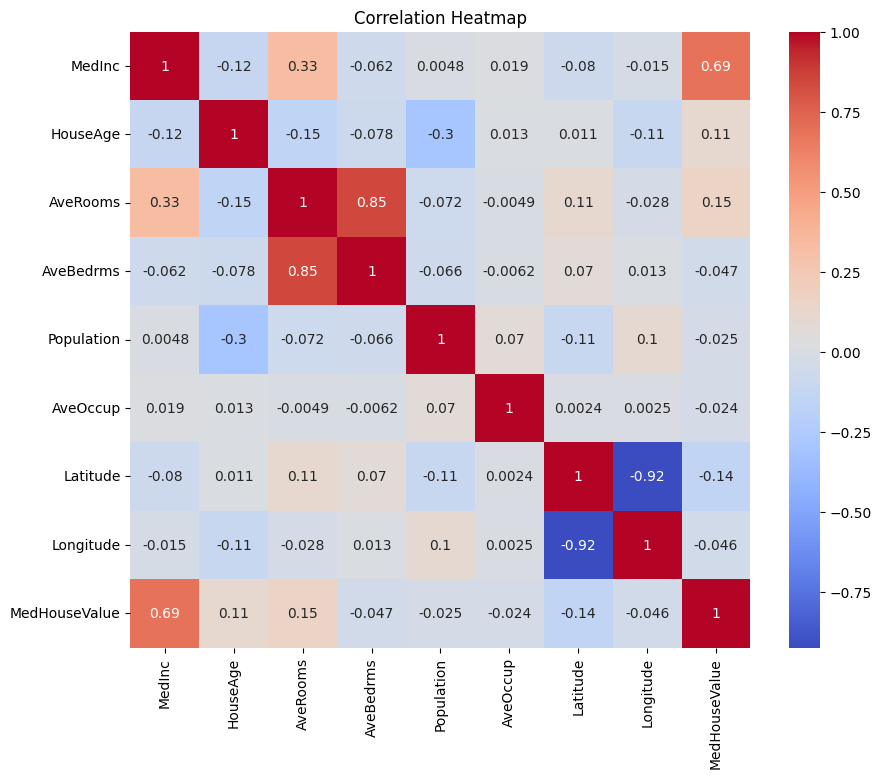

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split dataset
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)

# Coefficients & metrics
print("Intercept:", lr.intercept_)
print("Coefficients:", dict(zip(X.columns, lr.coef_)))
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: -37.02327770606409
Coefficients: {'MedInc': np.float64(0.44867490966571666), 'HouseAge': np.float64(0.009724257517904806), 'AveRooms': np.float64(-0.12332334282795815), 'AveBedrms': np.float64(0.7831449067929722), 'Population': np.float64(-2.029620580100075e-06), 'AveOccup': np.float64(-0.003526318487134238), 'Latitude': np.float64(-0.4197924865883604), 'Longitude': np.float64(-0.433708064963987)}
R² Score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


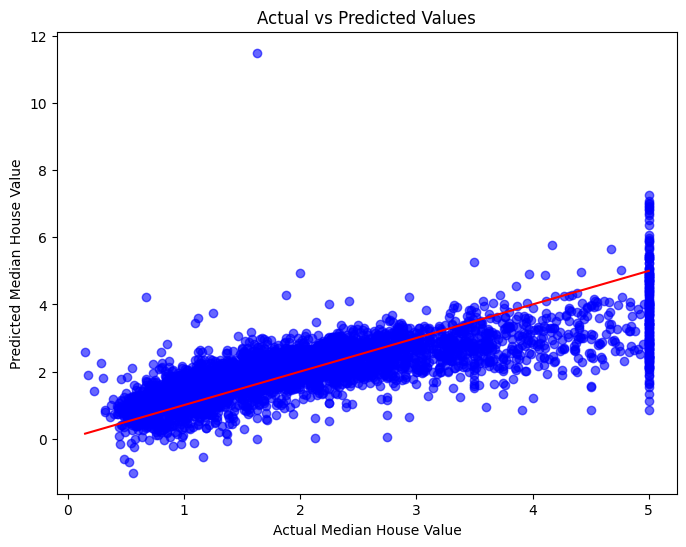

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Ideal line
plt.show()

# Comment: If points cluster around the red line, the model performs well. If spread out, it's less accurate.


Top correlated features: Index(['MedInc', 'AveRooms', 'Latitude', 'HouseAge'], dtype='object')
Improved R² Score: 0.5043169272470043
Improved MAE: 0.5993913548627591
Improved MSE: 0.6495475488975627
Improved RMSE: 0.8059451277212133


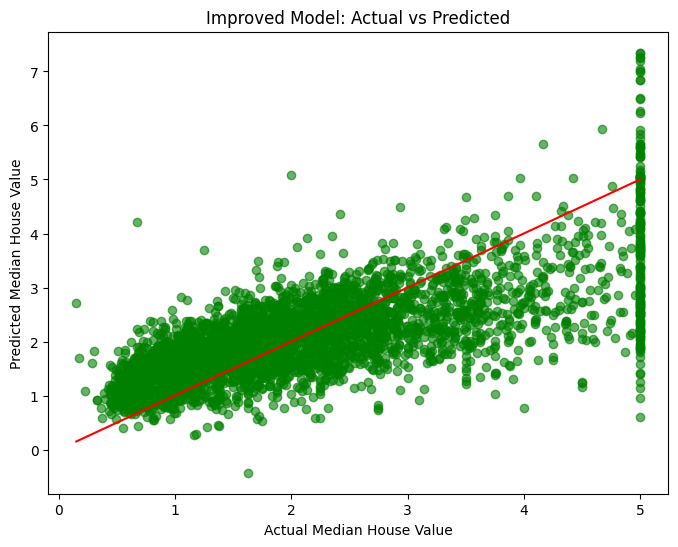

In [6]:
from sklearn.preprocessing import StandardScaler

# Select top 4 correlated features
top_features = df.corr()['MedHouseValue'].abs().sort_values(ascending=False)[1:5].index
print("Top correlated features:", top_features)

# Normalize selected features
scaler = StandardScaler()
X_selected = df[top_features]
X_scaled = scaler.fit_transform(X_selected)

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Retrain model
lr2 = LinearRegression()
lr2.fit(X_train_s, y_train_s)
y_pred_s = lr2.predict(X_test_s)

# New performance metrics
print("Improved R² Score:", r2_score(y_test_s, y_pred_s))
print("Improved MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("Improved MSE:", mean_squared_error(y_test_s, y_pred_s))
print("Improved RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))

# Plot again
plt.figure(figsize=(8, 6))
plt.scatter(y_test_s, y_pred_s, alpha=0.6, color='green')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Improved Model: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()
